# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as ss

plt.style.use('ggplot')
%matplotlib inline

df = pd.read_csv('data/human_body_temperature.csv')
temp = df.temperature

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [3]:
df.head(10)

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0
5,99.2,M,83.0
6,98.0,M,71.0
7,98.8,M,78.0
8,98.4,F,84.0
9,98.6,F,86.0


In [4]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


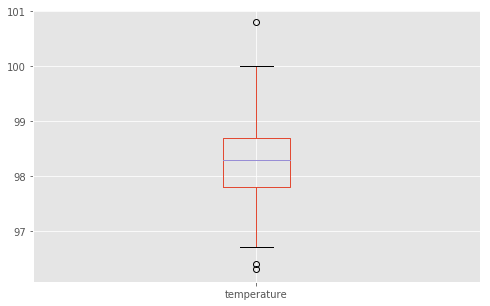

In [5]:
df.boxplot('temperature', figsize=(8,5)) #Presence of outliers, abnormal temps

<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>

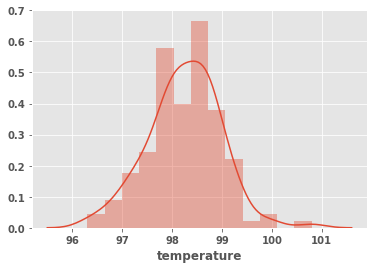

In [2]:
#Dist plot: histogram with normal curve overlay. Requires further examination
sns.distplot(temp, norm_hist=True)

In [8]:

def cdf(data):
    '''
    Cumulative distribution function: returns x and y coordinates 
    for plotting cdf for a given set of data
    '''
    
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, 1 + n) / n
    
    return x,y

C:\Users\vuong\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


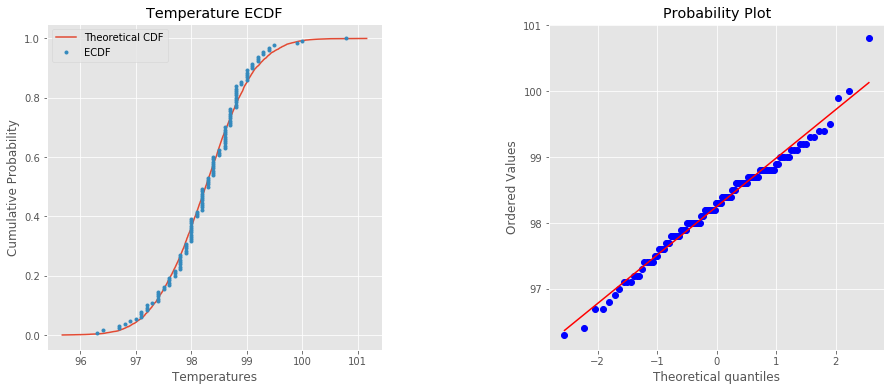

In [120]:
mu = np.mean(temp) #sample mean
sig = np.std(temp) #sample standard dev.
#drawing from normal dist. using sample mean and std 
theor_normal = np.random.normal(mu, sig, 10000)
#get coors. for theoretical dist. and sample data
th_x, th_y = cdf(theor_normal)
x, y = cdf(temp)

#Plot empirical cdf compared to theoretical to observe fit
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(th_x, th_y)
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('Temperatures')
plt.ylabel('Cumulative Probability')
plt.title('Temperature ECDF')
plt.legend(['Theoretical CDF', "ECDF"])



plt.subplot(1,2,1)

#Plot QQplot to observe normality
plt.subplots_adjust(wspace=.5)
plt.subplot(1,2,2)
_ = ss.probplot(temp, plot = plt)

In [10]:
np.random.seed(99)

tt, p_val = ss.shapiro(temp)
print(f'Test statistics: {tt}\nP-value: {p_val}')

Test statistics: 0.9865769743919373
P-value: 0.2331680953502655


<font color=blue>
As seen from various methods of checking for the normality condition above, we can safely proceed with this assumption. Graphically, the data does not stray far from the theoretical normal. The Shapiro-Wilk test for normality also confirms this normality assumption with p-val ~ 0.233, failing to reject null that the sample comes from a normal distribution.
</font>

<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>

<font color=blue>
We have a sample size of 130 (> 30) which is sufficiently large to apply the Central Limit Theorem.
</font>

<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>

In [11]:
def draw_bs_reps(data, func, size=1,):
    'Calculate and store bootstrap replicates for specified repetition'
    replicates = np.empty(size)    
    
    for i in range(size):
        bs_sample = np.random.choice(data, size = len(data))
        replicates[i] = func(bs_sample)
    
    return replicates


def diff(data, val = 98.6):
        'Difference of sample mean from hypothesized population mean'
    return np.mean(data) - val

In [12]:
diff_obs = diff(temp)  #Observed difference
#Shift the sample mean to conform to hypothesized distribution under the null
temp_shifted = temp - np.mean(temp) + 98.6
#draw 100000 bootstrap replicates
bs_reps = draw_bs_reps(temp_shifted, diff, 100000)
#Calculate p-val as proportion of replicates as or more extreme than data under the null
bs_pval = np.sum(bs_reps <= diff_obs) / len(bs_reps)
#p-val very small < 1/100000
bs_pval

0.0

<font color=blue>
    We use a one sample test since we have one sample comparing to a hypothesized population mean of 98.6 degrees. Furthermore, we use the t-statistic in this case considering our sample size. The z-statistic will be sufficient here since we have a large sample size. This large sample size will help offset the tendency for the standard normal distribution to underestimate the variance. <br/>
    We obtain a z-statistic of -5.48 and corresponding p-value (2-tailed) of approximately 0.0000000435. Considering any reasonable significance threshold, we reject the null hypothesis that the true population mean is 98.6 degrees F in favor of the alternative. When we use the t-statistic, the result holds with a small p-value (0.000000218. In other words, it is slightly more likely of an event that we would have observed our data or more extreme should the population mean actually be 98.6. This is consistent with the fact that the t-distribution has fatter tails, thus more area under the curve at the extremes. 
</font>

In [13]:
#sample mean and std.
s_mean = np.mean(temp)
s_std = np.std(temp)
#calculate test statistics
test_stat = (s_mean - 98.6) / (s_std / np.sqrt(130))
#using z-test for 2-tailed test: normal cdf from scipy.stats package
z_pval = ss.norm.cdf(test_stat) * 2
print(f'Test stat: {test_stat}, P-val: {z_pval}')

Test stat: -5.475925202078116, P-val: 4.3523151658821886e-08


In [14]:
#using t test
t_pval = ss.t.cdf(test_stat, df=129)*2
t_pval #Very small p-val

2.1887464624095175e-07

<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>

In [15]:
np.random.seed(999) #set seed for reproducibility
sample_10 = np.random.choice(temp, size=10) #randomly select 10 temps from sample
sample_10

array([98.8, 98.5, 98.3, 97.8, 98.4, 98.9, 97.4, 96.7, 96.7, 98.9])

In [16]:
test_stat_10 = (np.mean(sample_10) - 98.6) / (np.std(sample_10) / np.sqrt(10))
#Z-test
z_10_pval = ss.norm.cdf(test_stat_10) * 2 
z_10_pval #Reject null if alpha >= .05

0.02834653696485402

In [17]:
#T-test
t_10_pval = ss.t.cdf(test_stat_10, df = 9) * 2
t_10_pval #Fail to reject at alpha = .05

0.056025417645494305

<font color=blue>
Significance: $\alpha$ = .05

In this case where sample size is clearly smaller than the desired threshold of 30, we should go with the t-statistic. At this small sample size, our standard error will be fairly large and considering that the z distribution tends to underestimate variability, it would not be appropriate. The p-values resulting from both tests  lie in an ambiguous zone for decision making.  It is important to note that this result will vary wildly between random samples of 10 temperatures. In general, such a small sample size is not ideal for testing. However, if we have to work with what is given, it is best to use the t-statistic to better capture the parameter in question. Tweaking our draw_bs_reps function from above, we can simulate drawing p-values for the two tests repeatedly to see how the variability in our results is affected by choice of test at a small sample size. The difference in variability becomes negligible as sample size nears 30 and beyond. 
</font>

In [18]:
def draw_reps(data, func, n, size=1,):
    'Tweak the draw_bs_reps function'
    
    replicates = np.empty(size)    
    
    for i in range(size):
        bs_sample = np.random.choice(data, size = n)
        replicates[i] = func(bs_sample, n)
    
    return replicates

#Get p-val using z test
def get_z_pval(data, n, val = 98.6):
    
    ts = (np.mean(data) - val) / (np.std(data) / np.sqrt(n))
    p = ss.norm.cdf(ts) * 2
    return p

#Get p-val using t-test
def get_t_pval(data, n, val = 98.6):
    ts = (np.mean(data) - val) / (np.std(data) / np.sqrt(n))
    p = ss.t.cdf(ts, df=n-1) * 2
    return p

In [19]:
#Draw 100000 of each p-val to observe variability change with change in sample size
n_10_z = draw_reps(temp, get_z_pval, n=10, size=100000)
n_10_t = draw_reps(temp, get_t_pval, n=10, size=100000)
n_30_z = draw_reps(temp, get_z_pval, n=30, size=100000)
n_30_t = draw_reps(temp, get_t_pval, n=30, size=100000)

print(f'n = 10:\nZ: {np.var(n_10_z)}, T: {np.var(n_10_t)}')
print(f'n = 30:\nZ: {np.var(n_30_z)}, T: {np.var(n_30_t)}')

n = 10:
Z: 0.13644577004408137, T: 0.13110396613499972
n = 30:
Z: 0.021909304009416514, T: 0.022916941445708938


<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>

In [20]:
err_mar = 1.96 * temp.std() #margin of error with 95% confidence
#95% confidence interval using margin of error
ci = temp.mean() + np.array([-err_mar, err_mar])
ci

array([96.81219178, 99.68626976])

<font color=blue>
    Since we are examining 'abnormality' from the sample itself, standard deviation is used instead of standard error for N draws from population. We find a 95% confidence interval for our data to represent the boundary for normal temperatures. Temperatures below ~96.81 or above ~99.68 should be considered abnormal.
</font>

C:\Users\vuong\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


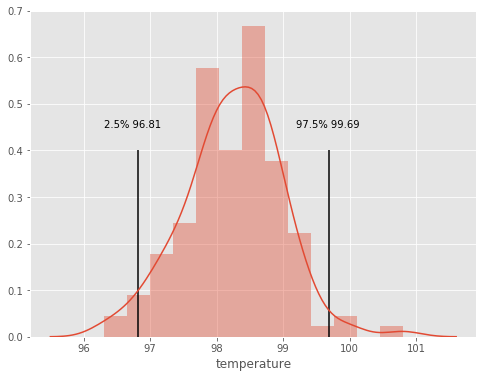

In [118]:
plt.figure(figsize=[8,6])
#Distplot with normal temperature boundaries
sns.distplot(temp)
plt.text(x=ci[0]-.5, y=.45, s=f'2.5% {np.round(ci[0],2)}')
plt.vlines(x=ci[0], ymin=0, ymax=.4)
plt.text(x=ci[1]-.5, y=.45,s=f'97.5% {np.round(ci[1],2)}')
plt.vlines(x=ci[1], ymin=0, ymax=.4)

In [25]:
#Simulate drawing one at a time from sample
temp_samples = np.empty(100000)

for i in range(100000):
    temp_samples[i] = np.random.choice(temp,1)

bs_ci = np.percentile(temp_samples, [2.5, 97.5])
bs_ci

array([96.7, 99.5])

<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>

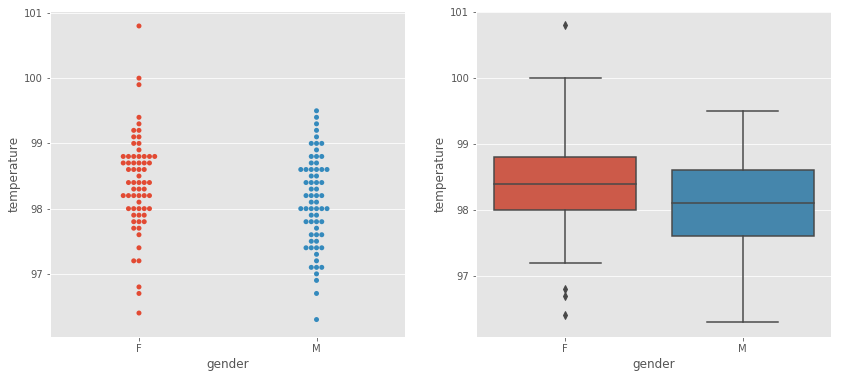

In [124]:
plt.figure(figsize=(14,6))
plt.subplot(121)
#examine differences in temperature by gender. Males appear to have more spread, lower mean. Females more outliers
_ = sns.swarmplot('gender', 'temperature', data=df)
plt.subplot(122)
_ = sns.boxplot('gender', 'temperature', data=df)

In [32]:
male_temp = df[df.gender == 'M'].temperature
fem_temp = df[df.gender == 'F'].temperature

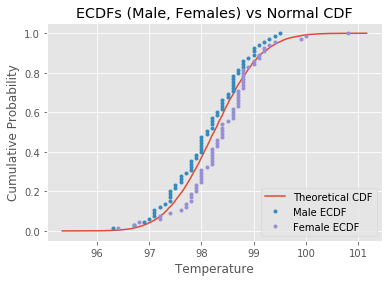

In [40]:
male_x, male_y = cdf(male_temp) #ECDF for male temps.
fem_x, fem_y = cdf(fem_temp) #Females temps

_ = plt.plot(th_x, th_y) #Plotting theoretical cdf from above

_ = plt.plot(male_x, male_y, marker = '.', linestyle='none')
_ = plt.plot(fem_x, fem_y, marker = '.', linestyle='none')

_ = plt.xlabel("Temperature")
_ = plt.ylabel("Cumulative Probability")
_ = plt.title("ECDFs (Male, Females) vs Normal CDF")
_ = plt.legend(['Theoretical CDF', 'Male ECDF', 'Female ECDF'], loc = 'lower right')
#Approximately normal for both gender

<font color=blue>
H0: mean male temp - mean female temp = 0 (The distributions are identical) <br/>
H1: Difference is not 0 (Different distributions by gender)<br/>
$\alpha$ = 0.05
<font/>

In [59]:
n_male, n_fem = len(male_temp), len(fem_temp) # n = 65 for both genders
m_mean = male_temp.mean()
f_mean = fem_temp.mean()

m_sd = male_temp.std()
f_sd = fem_temp.std()
#observed difference in gender means
gender_diff_observed = m_mean - f_mean
#standard error for the difference in mean temperature
se_diff = np.sqrt((m_sd ** 2 / n_male) + (f_sd ** 2 / n_fem))
#test statistic
t_stat_diff = gender_diff_observed / se_diff
#Z-test n1, n2 = 65 > 30
z_pval_diff = ss.norm.cdf(t_stat_diff) * 2
#t-test
t_pval_diff = ss.t.cdf(t_stat_diff, 64) * 2
#At significance alpha =.05, both tests reject the null that there are no difference in population mean
print(f'Z-test p-value: {z_pval_diff}\nT-test p-value: {t_pval_diff}')

Z-test p-value: 0.02228736076067726
T-test p-value: 0.025609613391862636


In [74]:
#95% confidence interval for the true difference between mean temps of male vs female.
diff_ci = gender_diff_observed + np.array([-1,1]) * 1.96 * se_diff
#Does not span 0: True difference is not 0
diff_ci

array([-0.53727651, -0.04118503])

In [84]:
#Permutation test
def permute_sample(data1, data2):
    'Perform permutation of 2 samples. Concat, permute, return permuted data'
    combined = np.concatenate((data1, data2))
    
    permuted = np.random.permutation(combined)
    
    perm_1 = permuted[:len(data1)]
    perm_2 = permuted[len(data1):]
    
    return perm_1, perm_2

def draw_perm_reps(data1, data2, func, size=1):
    'Permute and calculate replicates'
    
    replicates = np.empty(size)
    
    for i in range(size):
        perm_1, perm_2 = permute_sample(data1, data2)
        
        replicates[i] = func(perm_1, perm_2)
    
    return replicates

def mean_diff(data1, data2):
    'Difference between two sets of data'
    return np.mean(data1) - np.mean(data2)

In [89]:
np.random.seed(45789)
#Draw 10,000 permutation replicates
perm_reps = draw_perm_reps(male_temp, fem_temp, mean_diff, 10000)
#Reject null at alpha = 0.05: 
perm_pval = np.sum(perm_reps <= gender_diff_observed) / len(perm_reps)
perm_pval

0.0123

<font color=blue>
Considering our original temperature data as a whole, we can assume normality and proceed with testing. The long-held belief that the true mean body temperature of human is 98.6 degree F is rejected. We have evidence to suggest this value is different. This result is supported by both bootstrapping and frequentiest hypothesis testing. When our sample size dips (n=10), the previously significant results succumbs to high variability. Since the the standard error here is a biased estimate, we would generally use the t-test for smaller samples. Using our sample of 130, we are able to pinpoint a 95% confidence interval for 'normal' temperature. Values under 96.81 and above 99.68 degrees F would be considered abnormal within our sample. It is important to note that this is not a typical calculation for confidence interval for a true mean. As such bootstrapping and calculating replicates doesn't make much sense. Overall, our interval does seem to align with scientific findings of normal body temperature range. Finally, our hypothesis testing provides evidence to believe that there is a difference between male and female regarding body temperatures. Since our sample sizes for both genders are greater than 30, we can proceed with a 2 samples z-test for difference in means. Our findings for the t-test as well as a permutation test seem to support our result. There is evidence to suggest that on average males have lower body temperatures than females.
<font/>